# Isto demora imenso tempo
### Código do exemplo 9.1 do livro

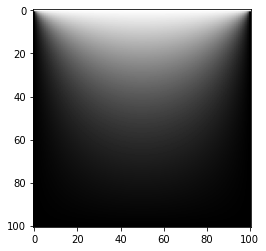

Wall time: 4min 22s


In [1]:
%%time
####### ficheiro laplace.py #######
from numpy import empty,zeros,max
from pylab import imshow,gray,show

# Constants
M = 100         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 1e-6   # Target accuracy

# Create arrays to hold potential values
phi = zeros([M+1,M+1],float)
phi[0,:] = V    # valores da barra de cima = V
phiprime = empty([M+1,M+1],float)

# Main loop
delta = 1.0
while delta > target:

    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:   # se tivermos nas fronteiras
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] \
                                 + phi[i,j+1] + phi[i,j-1])/4

    # Calculate maximum difference from old values
    delta = max(abs(phi-phiprime))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi

# Make a plot
imshow(phi)
gray()
show()

In [2]:
p = zeros([5,5],float)
p[0,:] = V
print(p)

[[1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


### Solução que aranjei apesar de não ter o enunciado

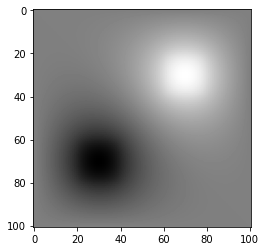

Wall time: 4min 12s


In [3]:
%%time
from numpy import sqrt, zeros
from pylab import imshow, show, gray

# Constants
epsilon_0 = 1
L = 1  # in meters
N = 100  # number of grid points on a side
a = L / N  # grid point spacing
rho_0 = 1 / sqrt(8.8541 * 10 ** -12)  # charge density scaled by sqrt(epsilon_0) (in SI) so epsilon_0 = 1
delta = 10 ** -6

def rho(i, j):
    if 20 < i < 40 and 60 < j < 80:
        return rho_0
    elif 60 < i < 80 and 20 < j < 40:
        return -rho_0
    else:
        return 0

# test = zeros([N+1,N+1], float)
# for i in range(N):
#     for j in range(N):
#         test[i,j] = rho(i,j)
# imshow(test)
# gray()
# show()

def larger(a, b):
    if a >= b:
        return a
    else:
        return b

# Solve poisson's equation using Gauss-Seidel relaxation method
max_diff = 2 * delta
# initialize array
phi = zeros([N + 1, N + 1], float)

while max_diff > delta:
    #  reset max difference after each complete update of grid
    max_diff = 0.0
    for i in range(N + 1):
        for j in range(N + 1):
            if not i == 0 and not j == 0 and not i == N and not j == N:
                old_phi = phi[i,j]
                new_phi = (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1] \
                             + a ** 2 / 4 * rho(i, j)) / 4
                phi[i, j] = new_phi

                # note the largest change in phi in this update of the grid
                max_diff = larger(max_diff, abs(new_phi - old_phi))
    # print("max_diff = ", max_diff)


imshow(phi)
gray()
show()